In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.constants as c
import astropy.units  as u

## you can undo the lines below (but it will be fun for making fancy plots!)
# to make the lines below work, you have to download the file 'PostProcessingScripts' from https://github.com/FloorBroekgaarden/common_code
# and put this in the same directory as this one, and then only use the bottom line from this code below 
import sys
sys.path.append('../../common_code') 
from PostProcessingScripts import * 

# to make the screen wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### data set from https://gwlandscape.org.au/publication/Q29tcGFzUHVibGljYXRpb25Ob2RlOjY2/  

In [2]:
path = '/Users/floorbroekgaarden/Downloads/GROWL/VanSon/COMPAS_Output_wWeights.h5' # change this line!  
fdata = h5.File(path, 'r')

print(fdata.keys())
print(fdata['BSE_Double_Compact_Objects'].keys())
print(fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned'].keys())
# print(fdata['data']['combined_dataframes'].keys())


<KeysViewHDF5 ['BSE_Double_Compact_Objects', 'BSE_RLOF', 'Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']>
<KeysViewHDF5 ['CE_Event_Counter', 'Immediate_RLOF>CE', 'MT_Donor_Hist(1)', 'MT_Donor_Hist(2)', 'Mass(1)', 'Mass(2)', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merges_Hubble_Time', 'Metallicity@ZAMS(1)', 'Optimistic_CE', 'SEED', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'mixture_weight']>
<KeysViewHDF5 ['DCOmask', 'merger_rate', 'merger_rate_z0', 'redshifts']>


In [3]:

M1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()]
weights = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['merger_rate_z0'][()]
DCOmask = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['DCOmask'][()]
print(len(M1), len(weights), len(DCOmask), len(M1[DCOmask]))

M1_BBHs = M1[DCOmask]

# plt.show()

2484379 1401406 2484379 1401406


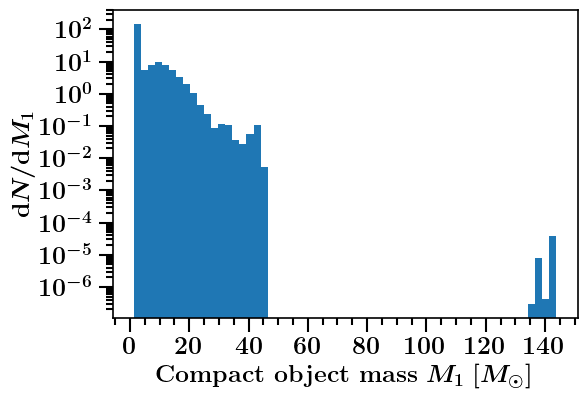

In [4]:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))

plt.hist(M1_BBHs, weights=weights, bins=60)
#make fancy plot: 
fontsize=16
xlabel = r'$\textbf{Compact object mass}$ $M_1$ $[M_{\odot}]$'
ylabel = r'$\textbf{d}N/\textbf{d}M_1$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens


plt.yscale('log')

plt.show()

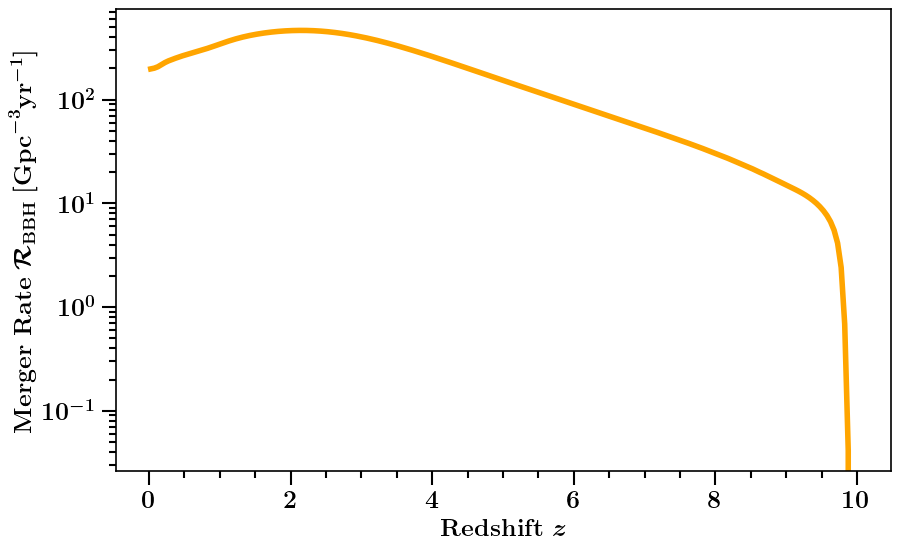

In [5]:
### let's plot the rate from the weights that were already provided in the orginal datafile ['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']

## the parameters that belong to this (check from paper)
mu_0 = 0.025
mu_z = -0.05
sigma_0 = 1.125
sigma_z = 0.05

merger_rate_per_binary_per_redshift = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['merger_rate'][()]
redshift_bin_edges   = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['redshifts'][()]

# take the middle of the redshifts (they are currently bin edges)
redshifts = (redshift_bin_edges[:-1] + redshift_bin_edges[1:])/2 
merger_rate = np.sum(merger_rate_per_binary_per_redshift, axis=0)


f, ax= plt.subplots(ncols=1,nrows=1, figsize=(10,6))

plt.plot(redshifts, merger_rate, lw=4, color='orange')
#make fancy plot: 
fontsize=16
ylabel = r'$\textbf{Merger Rate}$ $\mathcal{R}_{\rm{BBH}}$ $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
xlabel = r'$\textbf{Redshift } z$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens


plt.yscale('log')

plt.show()


In [6]:
fdata.close()

## Now lets re-run it with different parameters 

work in progress! To be Updated soon!

In [15]:
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/cosmic_integration') 

# importing some functions from this folder 
from cosmology import * 
from ClassCOMPAS import * 
from selection_effects import * 
# sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/cosmic_integration') 
import FasterCosmicIntegration
from cosmology import get_cosmology

In [8]:
import numpy as np

In [9]:
# FasterCosmicIntegration --path='/Users/floorbroekgaarden/Downloads/GROWL/VanSon/COMPAS_Output_wWeights.h5'

In [10]:
! ls

__pycache__                         cosmic_env
cosmic-integration-SSPC.ipynb       cosmic_integration
cosmic-integration-compas-fix.ipynb example_data


In [25]:

# filename   = 'COMPASCompactOutput_BHNS_A.h5'

full_data_path = '/Users/floorbroekgaarden/Downloads/GROWL/VanSon/COMPAS_Output_wWeights.h5'

import sys
import subprocess

result = subprocess.run([sys.executable, './cosmic_integration/FasterCosmicIntegration.py',
                        '--dco_type', 'BHNS',
                        '--mu0', '0.035', '--muz', '-0.23', '--sigma0', '0.39', '--sigmaz', '0.1',  '--alpha', '0.0',
                        '--zstep', '1',
                        '--path', '/Users/floorbroekgaarden/Downloads/GROWL/VanSon/COMPAS_Output_wWeights.h5' 
                        
                        ], capture_output=True, text=True)



print(result.stdout)
if result.stderr:
    print("Errors:", result.stderr)

# ! source ~/miniconda3/etc/profile.d/conda.sh 
# ! conda activate cosmic_env

# ! python ./cosmic_integration/FasterCosmicIntegration.py

# ! /Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/cosmic_env/bin/python cosmic_integration/FasterCosmicIntegration.py  \
# --dco_type "BHNS" \
# --mu0 0.035 --muz -0.23 --sigma0 0.39 --sigmaz 0.1 --alpha 0.0 \
# --weight 'weight' \
# --zstep 1\
# --sens O3 --m1min 10. \
# --aSF 0.01 --bSF 2.77 --cSF 2.9 --dSF 4.7 \
# --path $full_data_path \
# # --dontAppend 





doing optimistic CE and yes RLOFafterCEE False

Errors: Traceback (most recent call last):
  File "/Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/./cosmic_integration/FasterCosmicIntegration.py", line 970, in <module>
    main()
  File "/Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/./cosmic_integration/FasterCosmicIntegration.py", line 904, in main
    formation_rate, merger_rate, redshifts = find_detection_rate(
  File "/Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/./cosmic_integration/FasterCosmicIntegration.py", line 432, in find_detection_rate
    COMPAS.setCOMPASData()
  File "/Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/cosmic_integration/ClassCOMPAS.py", line 161, in setCOMPASData
    self.get_COMPAS_variables("BSE_Double_Compact_Objects", ["Mass(1)", "Mass(2)", "Time", "Coalescence_Time", "SEED"])
  File "/Users/floorbroekgaarden/Projects/GitHu

In [12]:
fdata 

/Library/Frameworks/Python.framework/Versions/3.11/bin/pip
